In [1]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [33]:
df1 = Table.read_table('Climate1SupportiveLevel.csv', sep=',')
df2 = Table.read_table('ClimateBalancedDS2.csv', sep=',')
t1 = df1.append(df2)

In [34]:
t1_positive = t1.where( 'Support', are.equal_to(1))
t1_negative = t1.where( 'Support', are.equal_to(0))
t1_positive

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @sydneyleemarco: nothing like an 80 degree october da ...,1
@MerlenesMemos @CNN It's not an act of god. Climate chan ...,1
@BjornLomborg I think looking at climate change in terms ...,1
RT @KateRaworth: If you feel the dissonance between the ...,1
I cannot find one attribute that qualifies this man for ...,1
@Weinsteinlaw His base doesn t care. unaffiliated who su ...,1
RT @idea2go: The definition of #ClimateBreakdown from @G ...,1
sexy I don't die of natural causes at least a decade bef ...,1


In [35]:
data = t1_positive.append(t1_negative)

In [36]:
data_tagged_X= list(data['Text'])
data_tagged_Y= list(data['Support'])

print('tagged data input size', len(data_tagged_X))
print('tagged data prediction size', len(data_tagged_Y))

tagged data input size 2883
tagged data prediction size 2883


In [37]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle= True)

In [38]:
fold = 1
precision = []
recall = []
f1 = []

In [42]:
for train_index, test_index in skf.split(data_tagged_X, data_tagged_Y):
    print("Fold Number:", fold)
    print("Training Data Index:", train_index)
    print("Testing Data Index:", test_index)
    
    x_train= list(data.take(train_index)['Text']) 
    y_train= list(data.take(train_index)['Support'])
    x_test= list(data.take(test_index)['Text'])
    y_test= list(data.take(test_index)['Support'])
    print("Testing Data Target Output:", y_test)
    
    count_vect= CountVectorizer(token_pattern='(([#@]|[0-9]|[a-z]|[A-Z])+)',analyzer='word',min_df = 3, 
                                stop_words=[("a", "a"), ("an", "n"), ("the", "e"), ("this", "s"), ("that", "t"), ("is", "s")])
    x_word_vect = count_vect.fit_transform(x_train)
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth =10, min_samples_leaf =10)
    clf.fit(x_word_vect, y_train) 
    
    dot_data= tree.export_graphviz(clf, out_file=None, feature_names=count_vect.get_feature_names())
    graph = graphviz.Source(dot_data)
    file_name = 'SupportClassifier-Fold' + str(fold)
    graph.render(file_name)
    print("Saving Decision Tree Visualization in", file_name)
    
    x_test_word_vect = count_vect.transform(x_test)
    predicted_y_test= clf.predict(x_test_word_vect)
    print("Testing Data Prediction Output:", predicted_y_test)
    
    precision.append(precision_score(y_test, predicted_y_test)) 
    recall.append(recall_score(y_test, predicted_y_test)) 
    f1.append(f1_score(y_test, predicted_y_test))
    print("Precision Score:", precision_score(y_test, predicted_y_test))    
    print("Recall Score:", recall_score(y_test, predicted_y_test))    
    print("f1 Score:", f1_score(y_test, predicted_y_test)) 
    fold=fold+1

Fold Number: 6
Training Data Index: [   0    1    2 ... 2880 2881 2882]
Testing Data Index: [   3   19   30   37   48   49   51   53   56   60   65   75   80   81
   87   88   91   94  101  102  104  107  108  111  115  119  120  133
  140  142  158  159  167  169  177  181  186  190  194  198  201  204
  211  223  227  231  236  248  255  258  259  264  267  268  270  283
  285  288  292  299  301  302  304  309  314  321  325  330  335  359
  361  372  386  396  400  406  408  409  418  421  424  426  428  432
  435  442  443  446  452  460  462  478  481  487  490  491  494  495
  496  498  516  520  525  529  531  534  538  546  547  556  558  563
  571  573  574  579  581  593  597  598  602  608  616  622  623  628
  634  635  636  638  643  644  654  659  675  679  680  682  692  705
  718  719  731  735  736  742  757  759  763  766  771  785  786  799
  804  813  816  821  823  824  827  830  831  833  839  841  858  863
  866  870  874  876  888  892  893  898  899  900  906 

Saving Decision Tree Visualization in SupportClassifier-Fold7
Testing Data Prediction Output: [0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 0 0

Saving Decision Tree Visualization in SupportClassifier-Fold9
Testing Data Prediction Output: [1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 1

In [43]:
print("Precision List:", precision)    
print("Recall List:", recall)    
print("f1 List:", f1) 

Precision List: [0.6291208791208791, 0.6424242424242425, 0.6331521739130435, 0.6214689265536724, 0.6170212765957447, 0.6283422459893048, 0.6424242424242425, 0.6351351351351351, 0.6214689265536724, 0.6170212765957447]
Recall List: [0.7532894736842105, 0.6996699669966997, 0.768976897689769, 0.7260726072607261, 0.66996699669967, 0.7730263157894737, 0.6996699669966997, 0.7755775577557755, 0.7260726072607261, 0.66996699669967]
f1 List: [0.68562874251497, 0.669826224328594, 0.6944858420268255, 0.669710806697108, 0.6424050632911392, 0.6932153392330384, 0.669826224328594, 0.6983655274888558, 0.669710806697108, 0.6424050632911392]


In [44]:
print("Average Precision:", np.mean(precision))
print("Averag Recall:", np.mean(recall))   
print("Averag F1:", np.mean(f1)) 

Average Precision: 0.6287579325305681
Averag Recall: 0.7262289386833422
Averag F1: 0.6735579639897372


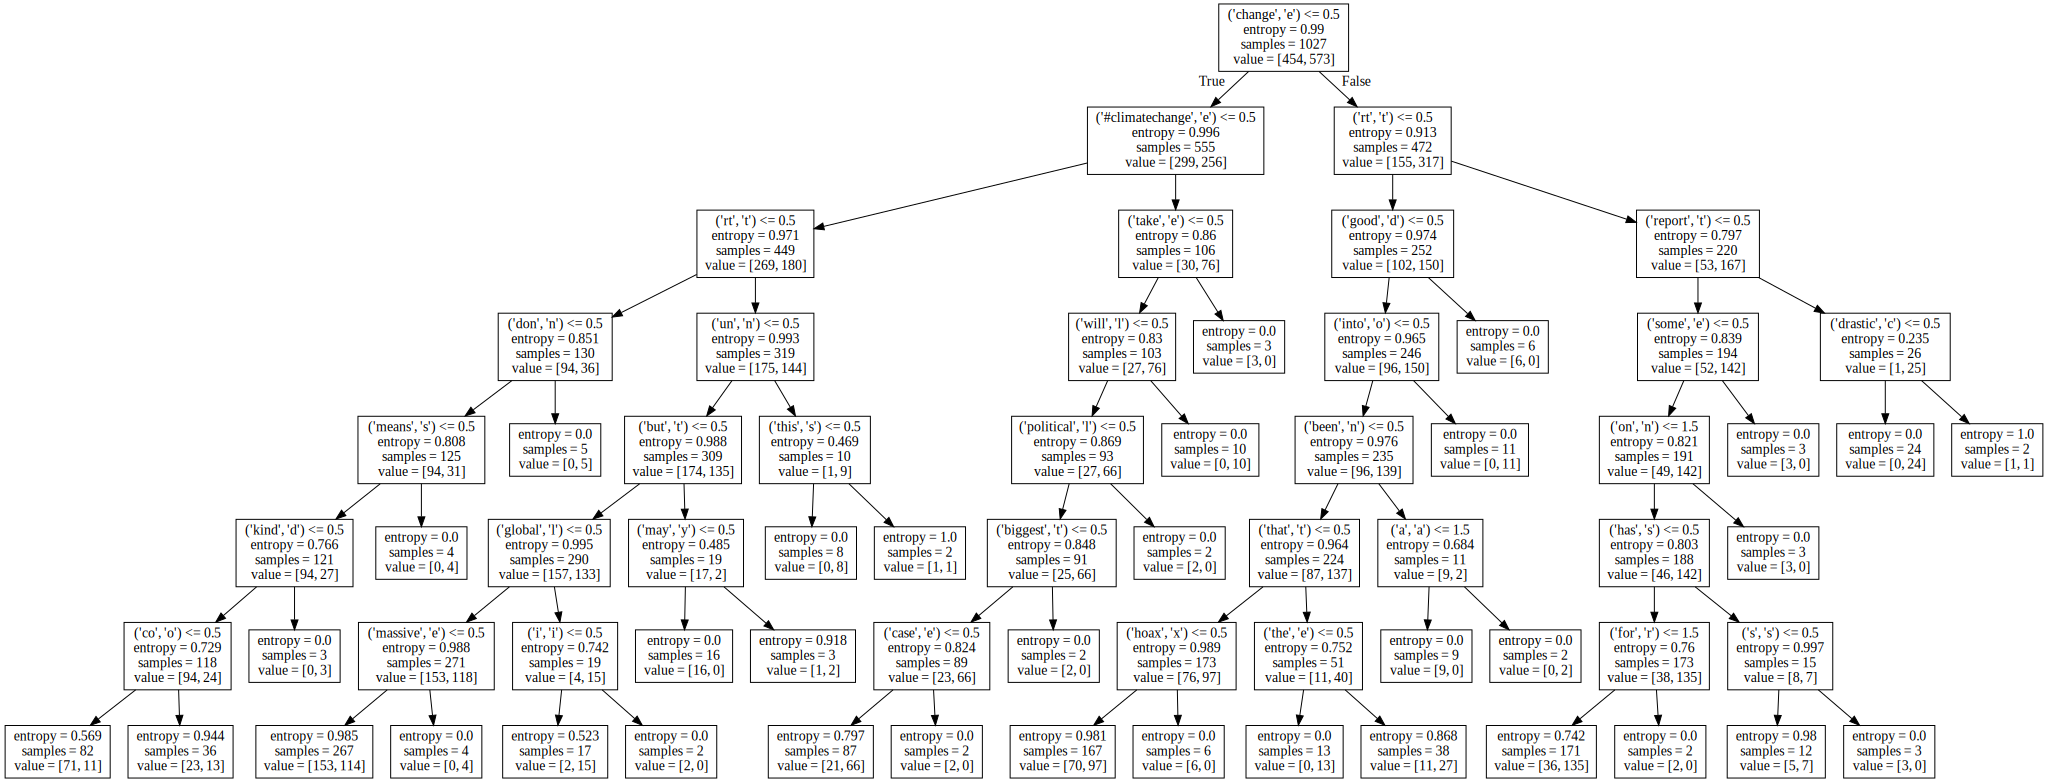

In [33]:
graph